<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [2]:
# Import Libraries (pandas, numpy, matplotlib)
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# ....
# ...
# ...


### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________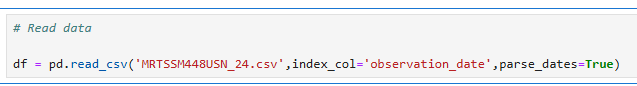

In [3]:
df=pd.read_csv("MRTSSM448USN_24.csv",index_col='observation_date',parse_dates=True)

In [4]:
#pd.read_csv

In [5]:
# Print the first few rows of data
#d
# ...

In [6]:
df.head()

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________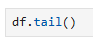

In [7]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [8]:
# Set name of column as 'Sales'. Use - df.columns 

# ...


In [9]:
df.columns=["sales"]
df.head()

,sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________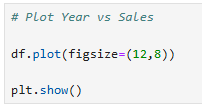

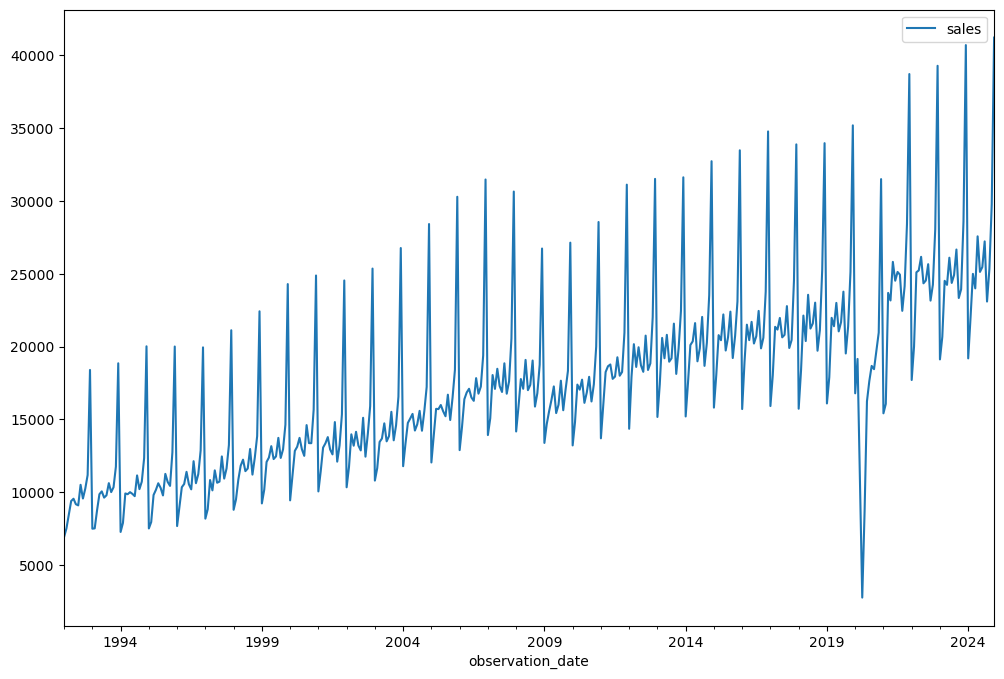

In [10]:
df.plot(figsize=(12,8))
plt.show()

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________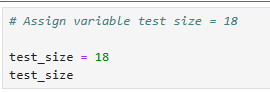

In [11]:
test_size=18
test_size

18

__________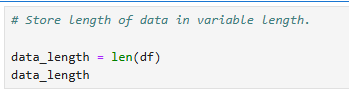

In [12]:
data_length=len(df)
data_length

396

__________________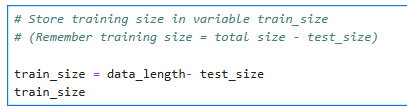

In [13]:
train_size=data_length-test_size
train_size

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________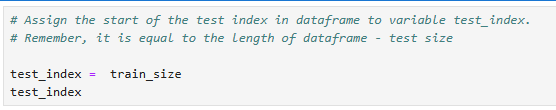

In [14]:
test_index=train_size
test_index

378

Next, we will separate train and test datasets.

_________________________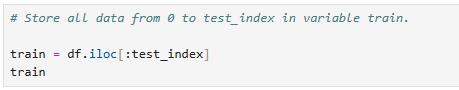

In [15]:
train=df.iloc[:test_index]
train

,sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [16]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc
test=df.iloc[test_index:]
test
# ...
# ...


,sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [17]:
# Print the size of the train data

# ...
print(train_size)
# Print the size of the test data
print(test_size)
# ...


378
18


### In Neural Networks, we need to Scale Data between 0-1

___________________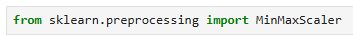

In [18]:
from sklearn.preprocessing import MinMaxScaler


_______________________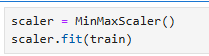

In [19]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

__________________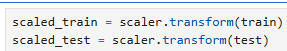

In [20]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [21]:
# Check if the data has been scaled properly
# Print max and min for train and test
print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())
# ...
# ...
# ...
# ...

1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________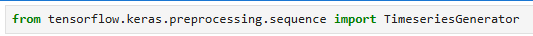

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
#TimeseriesGenerator?

_________________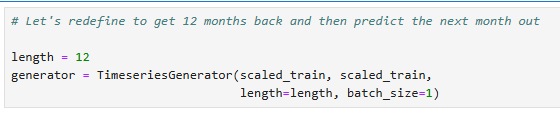

In [24]:
length=12
generator=TimeseriesGenerator(scaled_train, scaled_train,length=length,batch_size=1)

_______________________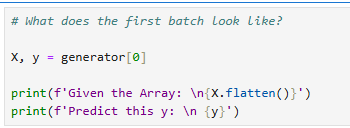

In [25]:
x,y=generator[0]

print(f'Given the array:\n{x.flatten()}')
print(f'predict this y:\n{y}')

Given the array:
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
predict this y:
[[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________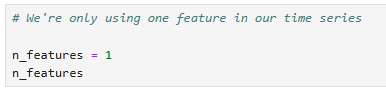

In [27]:
n_features=1
n_features

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [28]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
model=Sequential()
model.add(GRU(56,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))
# .....
# .....


C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 56)                  │           9,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              57 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,969 (38.94 KB)

 Trainable params: 9,969 (38.94 KB)

 Non-trainable params: 0 (0.00 B)

_____________________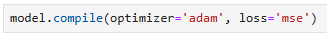

In [30]:
model.compile(optimizer="adam",loss="mse")

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [31]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=1)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

LAST_DIGIT_IN_YOUR_SID = 9

early_stop = EarlyStopping(monitor='val_loss',patience=LAST_DIGIT_IN_YOUR_SID)


_____________________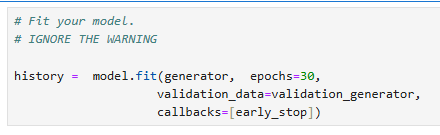

In [34]:
history=model.fit(generator,epochs=10,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0360 - val_loss: 0.0430
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0136 - val_loss: 0.0277
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0148 - val_loss: 0.0657
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0117 - val_loss: 0.0572
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0113 - val_loss: 0.0210
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0029 - val_loss: 0.0042


_____________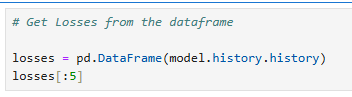

In [35]:
losses=pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.021600,0.043016
1,0.015203,0.027712
2,0.014777,0.065727
3,0.013179,0.057196
4,0.010977,0.021013


___________________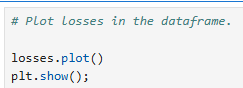

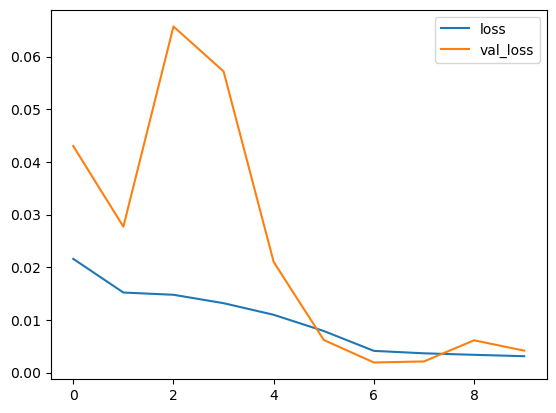

In [36]:
losses.plot()
plt.show();

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

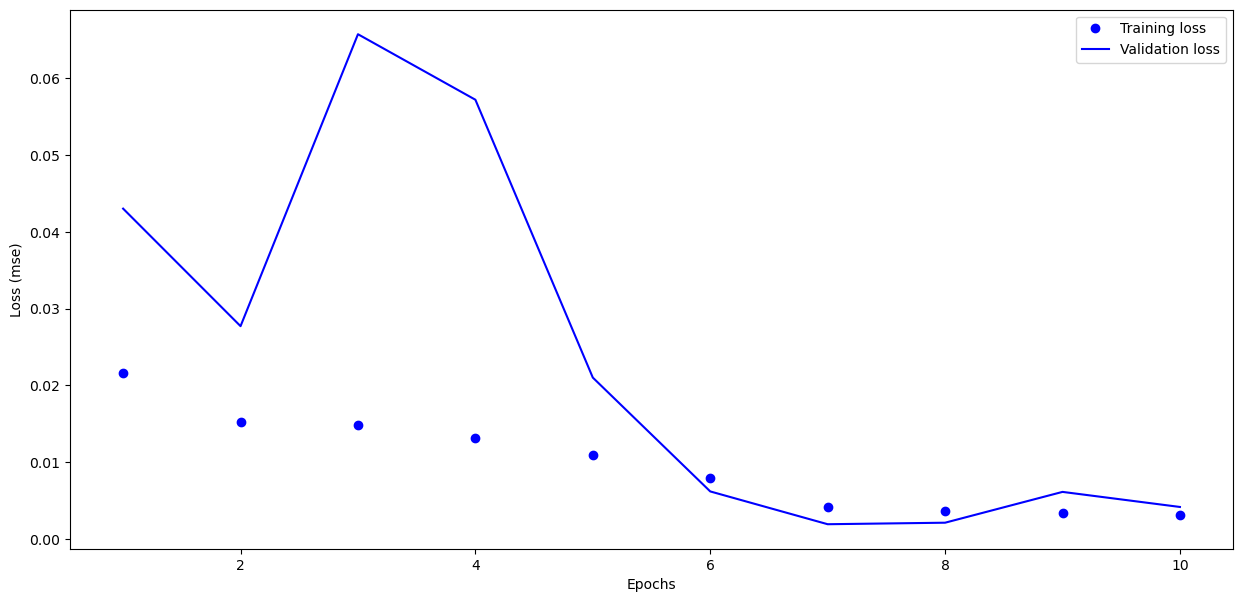

In [37]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________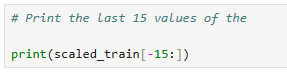

In [38]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________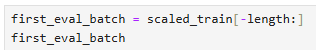

In [39]:
first_eval_batch=scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [40]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________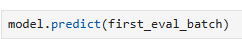

In [41]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


array([[0.6437067]], dtype=float32)

_________________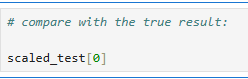

In [42]:
scaled_test[0]

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch


array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [44]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [45]:
test_predictions

[array([0.6437067], dtype=float32),
 array([0.67536455], dtype=float32),
 array([0.6239134], dtype=float32),
 array([0.6456357], dtype=float32),
 array([0.7402257], dtype=float32),
 array([1.1444074], dtype=float32),
 array([0.44976413], dtype=float32),
 array([0.52447337], dtype=float32),
 array([0.6583778], dtype=float32),
 array([0.65394056], dtype=float32),
 array([0.703589], dtype=float32),
 array([0.66778487], dtype=float32),
 array([0.71478826], dtype=float32),
 array([0.7497345], dtype=float32),
 array([0.70818406], dtype=float32),
 array([0.7255816], dtype=float32),
 array([0.8289573], dtype=float32),
 array([1.3276331], dtype=float32)]

### Inverse Transformations and Compare

_________________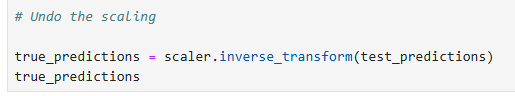

In [46]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[26262.92560923],
       [27418.02647918],
       [25540.72849309],
       [26333.31066406],
       [29784.6141206 ],
       [44531.99249542],
       [19186.54390252],
       [21912.45981914],
       [26798.23174506],
       [26636.32915556],
       [28447.85265154],
       [27141.46653968],
       [28856.47917241],
       [30131.56346452],
       [28615.51192254],
       [29250.29534155],
       [33022.16570783],
       [51217.35046935]])

_____________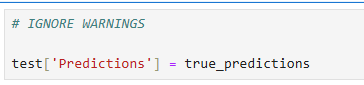

In [47]:
test["Predictions"]=true_predictions

C:\Users\Dhana\AppData\Local\Temp\ipykernel_20400\4106173052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"]=true_predictions


### Check and plot predictions

In [48]:
# Print the test variable
test
# ...

,sales,Predictions
observation_date,,
2023-07-01,24911,26262.925609
2023-08-01,26657,27418.026479
2023-09-01,23332,25540.728493
2023-10-01,23933,26333.310664
2023-11-01,28580,29784.614121
2023-12-01,40684,44531.992495
2024-01-01,19188,19186.543903
2024-02-01,22005,21912.459819
2024-03-01,24986,26798.231745


_______________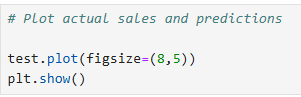

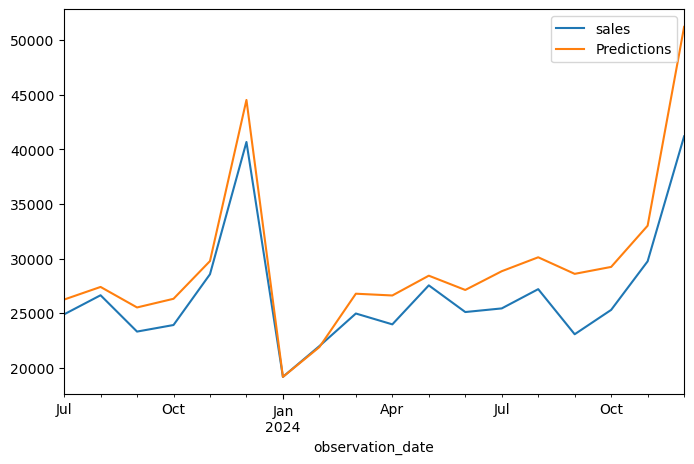

In [49]:
test.plot(figsize=(8,5))
plt.show()

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [50]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [51]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [52]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [53]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model
model=Sequential()
model.add(GRU(78,activation="relu",input_shape=(length,n_features)))
model.add(Dense(1))

# ...
# ...
# ...


C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 78)                  │          18,954 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              79 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,033 (74.35 KB)

 Trainable params: 19,033 (74.35 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# your code to compile the model
# ...

In [56]:
model.compile(optimizer='adam', loss='mse')

In [57]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

LAST_DIGIT_IN_YOUR_SID = 9

early_stop = EarlyStopping(monitor='val_loss',patience=LAST_DIGIT_IN_YOUR_SID)


In [74]:
history_2=model.fit(generator,epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0010 - val_loss: 0.0086
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.4436e-04 - val_loss: 0.0021
Epoch 12/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/

____________________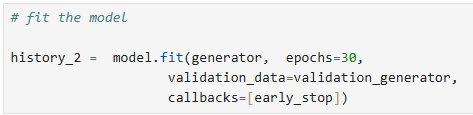

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

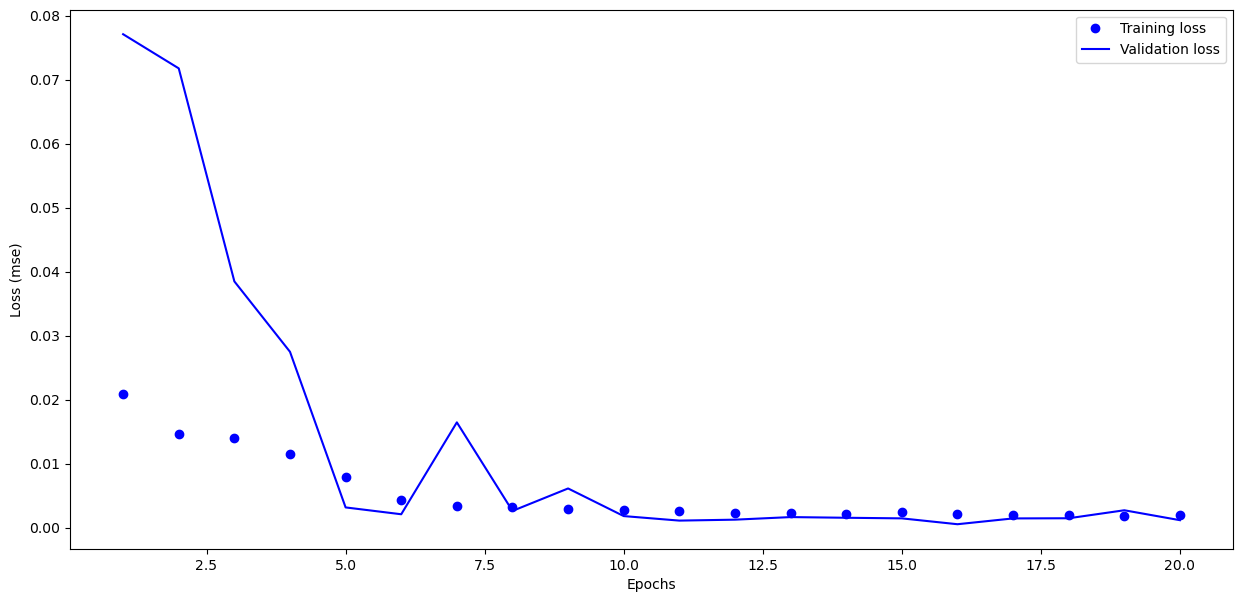

In [59]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [60]:
# You can use the code created above to type the next cell code

_________________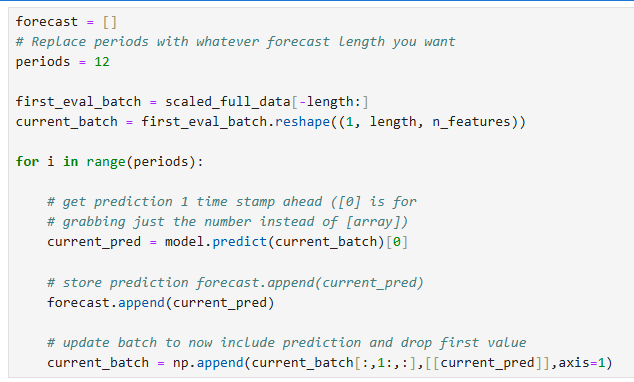

In [61]:
forecast=[]
periods=12
first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


______________________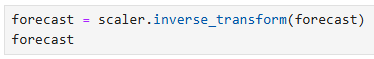

In [62]:
forecast=scaler.inverse_transform(forecast)
forecast

array([[18332.49550968],
       [21414.28612757],
       [24965.90633804],
       [24414.513246  ],
       [27053.68530226],
       [25543.60357165],
       [26102.3409453 ],
       [27395.1128425 ],
       [24380.67779046],
       [25260.11908591],
       [28188.39312255],
       [40772.65982044]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [63]:
df

,sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [64]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [65]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [66]:
forecast_df

,Forecast
2025-01-01,18332.495510
2025-02-01,21414.286128
2025-03-01,24965.906338
2025-04-01,24414.513246
2025-05-01,27053.685302
2025-06-01,25543.603572
2025-07-01,26102.340945
2025-08-01,27395.112843
2025-09-01,24380.677790
2025-10-01,25260.119086


__________________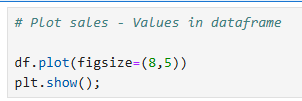

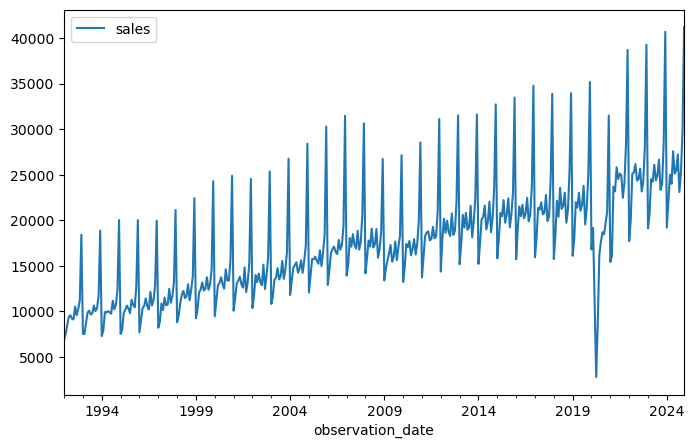

In [67]:
df.plot(figsize=(8,5))
plt.show();

____________________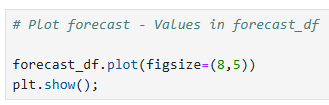

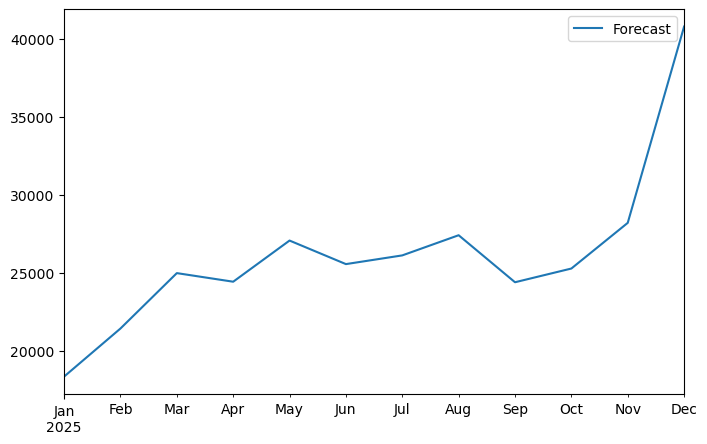

In [68]:
forecast_df.plot(figsize=(8,5))
plt.show();

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________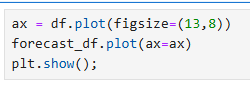

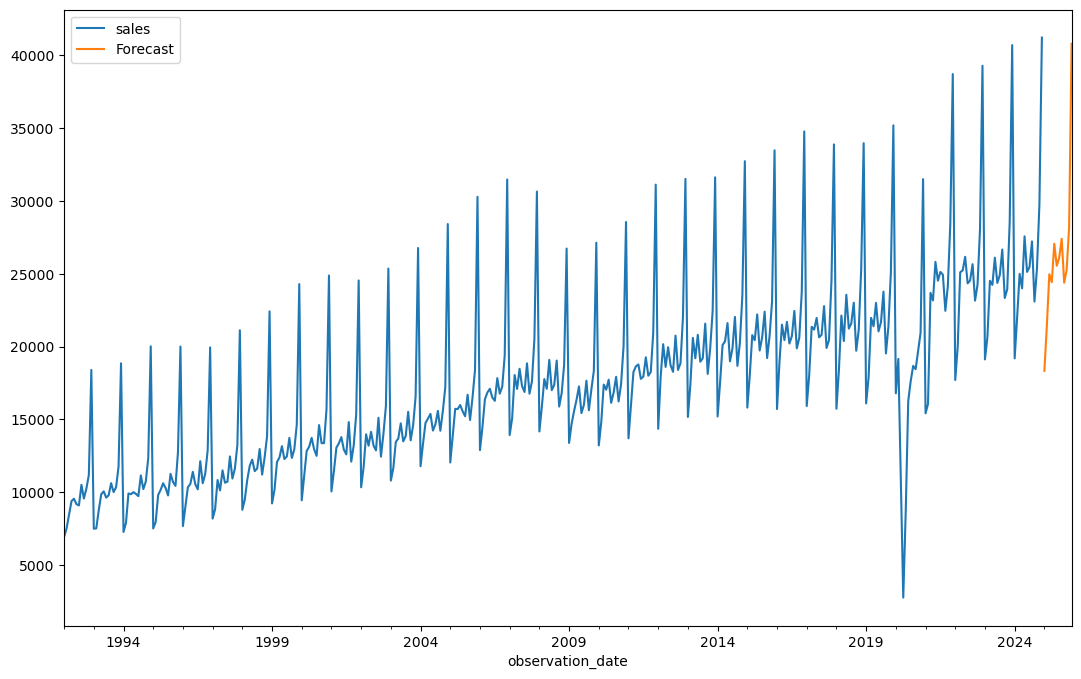

In [69]:
ax=df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show();

_______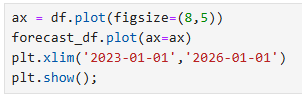

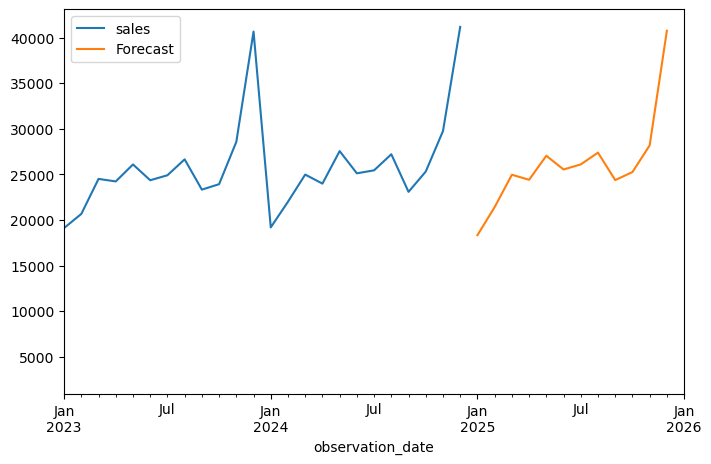

In [70]:
ax=df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim("2023-01-01","2026-01-01")
plt.show();

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [71]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [72]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

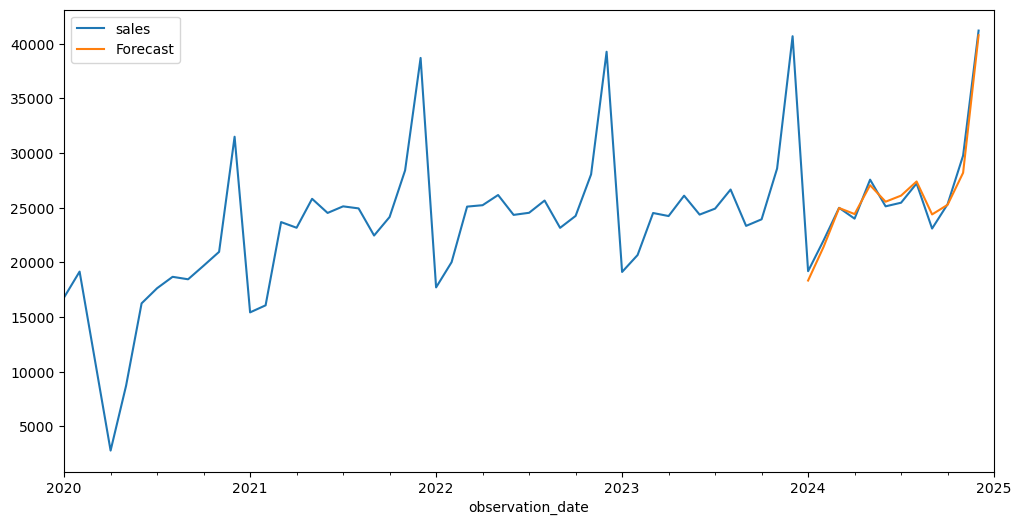

In [73]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!